In [29]:
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
%matplotlib inline

In [30]:
from sklearn.cluster import	KMeans
# from scipy.spatial.distance import cdist 

In [31]:
customer = pd.read_excel("Telco_customer_churn (1).xlsx")
customer

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,No,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,Q3,No,0,72,None,Yes,22.77,No,...,No,Two Year,Yes,Bank Withdrawal,21.15,1419.40,19.31,0,1639.44,3039.53
7039,6840-RESVB,1,Q3,Yes,1,24,Offer C,Yes,36.05,Yes,...,Yes,One Year,Yes,Mailed Check,84.80,1990.50,48.23,0,865.20,2807.47
7040,2234-XADUH,1,Q3,Yes,4,72,None,Yes,29.66,Yes,...,Yes,One Year,Yes,Credit Card,103.20,7362.90,45.38,0,2135.52,9453.04
7041,4801-JZAZL,1,Q3,Yes,1,11,None,No,0.00,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,29.60,346.45,27.24,0,0.00,319.21


In [32]:
# Create dummy variables
df_new = pd.get_dummies(customer)
df_new_1 = pd.get_dummies(customer, drop_first = True)
# we have created dummies for all categorical columns

In [33]:
from sklearn.preprocessing import OneHotEncoder

In [34]:

# Creating instance of One Hot Encoder
enc = OneHotEncoder() # initializing method

In [35]:
enc_df = pd.DataFrame(enc.fit_transform(customer.iloc[:, :]).toarray())

In [36]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder

In [37]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

In [38]:
# Data Split into Input and Output variables
X = customer.iloc[:, :]
y = customer['Payment Method']

In [39]:
categorical_features=[feature for feature in customer.columns if customer[feature].dtypes=='O']
categorical_features

['Customer ID',
 'Quarter',
 'Referred a Friend',
 'Offer',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Internet Type',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Contract',
 'Paperless Billing',
 'Payment Method']

In [40]:
len(categorical_features)

19

In [41]:
categorical_features[:18]

['Customer ID',
 'Quarter',
 'Referred a Friend',
 'Offer',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Internet Type',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Contract',
 'Paperless Billing']

In [42]:
for i in categorical_features:
    X[i]= labelencoder.fit_transform(X[i])

In [43]:
y = labelencoder.fit_transform(y) 
y = pd.DataFrame(y)

## concatenate X and y

In [44]:
df_new = pd.concat([X, y], axis =1)

In [45]:
df_new.columns
df_new = df_new.rename(columns={0:'Type'})

In [46]:
df_new.columns

Index(['Customer ID', 'Count', 'Quarter', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Type'],
      dtype='object')

In [47]:
df_new

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Type
0,6207,1,0,0,0,1,0,0,0.00,0,...,0,1,0,39.65,39.65,0.00,20,0.00,59.65,0
1,5305,1,0,1,1,8,5,1,48.85,1,...,0,1,1,80.65,633.30,0.00,0,390.80,1024.10,1
2,1129,1,0,0,0,18,4,1,11.33,1,...,0,1,0,95.45,1752.55,45.61,0,203.94,1910.88,0
3,3208,1,0,1,1,25,3,1,19.76,0,...,0,1,0,98.50,2514.50,13.43,0,494.00,2995.07,0
4,3419,1,0,1,1,37,3,1,6.33,1,...,0,1,0,76.50,2868.15,0.00,0,234.21,3102.36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1758,1,0,0,0,72,0,1,22.77,0,...,2,1,0,21.15,1419.40,19.31,0,1639.44,3039.53,0
7039,4853,1,0,1,1,24,3,1,36.05,1,...,1,1,2,84.80,1990.50,48.23,0,865.20,2807.47,2
7040,1525,1,0,1,4,72,0,1,29.66,1,...,1,1,1,103.20,7362.90,45.38,0,2135.52,9453.04,1
7041,3367,1,0,1,1,11,0,0,0.00,0,...,0,1,0,29.60,346.45,27.24,0,0.00,319.21,0


In [48]:
dataset = df_new.copy()

# decreate values

In [49]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in customer.columns if len(customer[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 21


In [50]:
discrete_feature

['Count',
 'Quarter',
 'Referred a Friend',
 'Number of Referrals',
 'Offer',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Internet Type',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Total Extra Data Charges']

# Continous Features

In [51]:
continuous_feature=[feature for feature in customer.columns if feature not in discrete_feature ]
print("Continuous feature Count {}".format(len(continuous_feature)))


Continuous feature Count 9


In [52]:
continuous_feature

['Customer ID',
 'Tenure in Months',
 'Avg Monthly Long Distance Charges',
 'Avg Monthly GB Download',
 'Monthly Charge',
 'Total Charges',
 'Total Refunds',
 'Total Long Distance Charges',
 'Total Revenue']

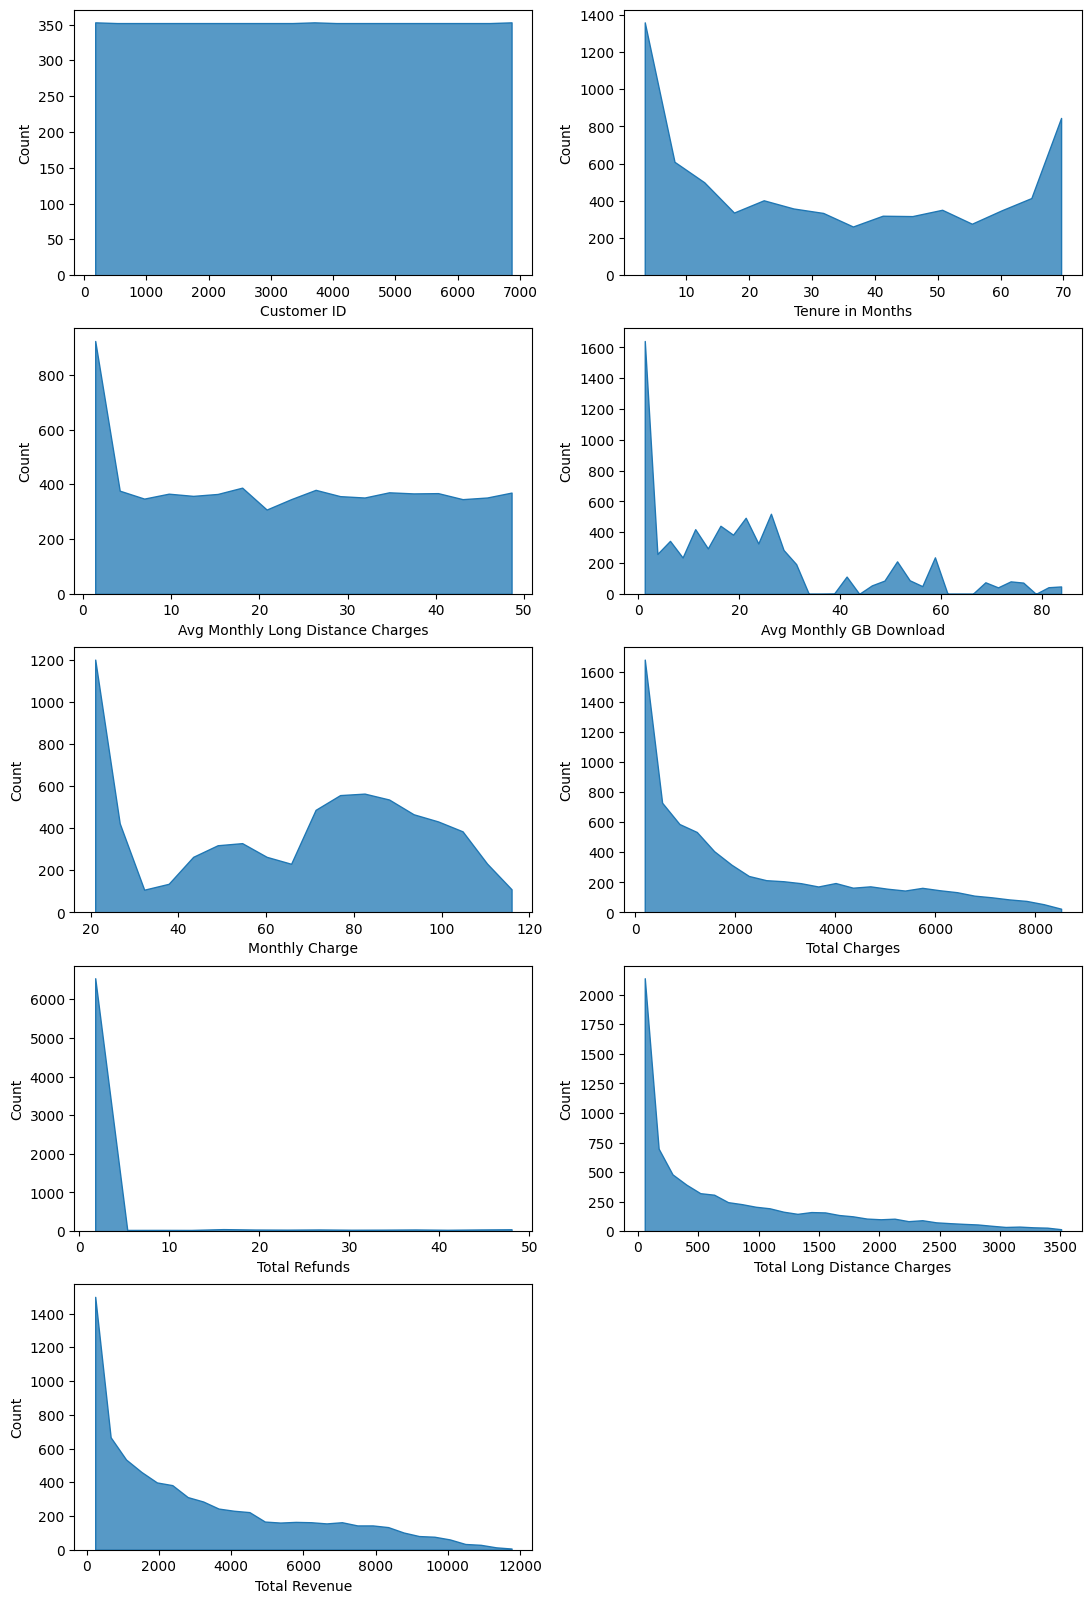

In [53]:
a = 5  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(13,20))

for i in continuous_feature:
    plt.subplot(a, b, c)

    sns.histplot(x= i ,data= customer, element= "poly", palette="deep" )

    c = c + 1

plt.show()

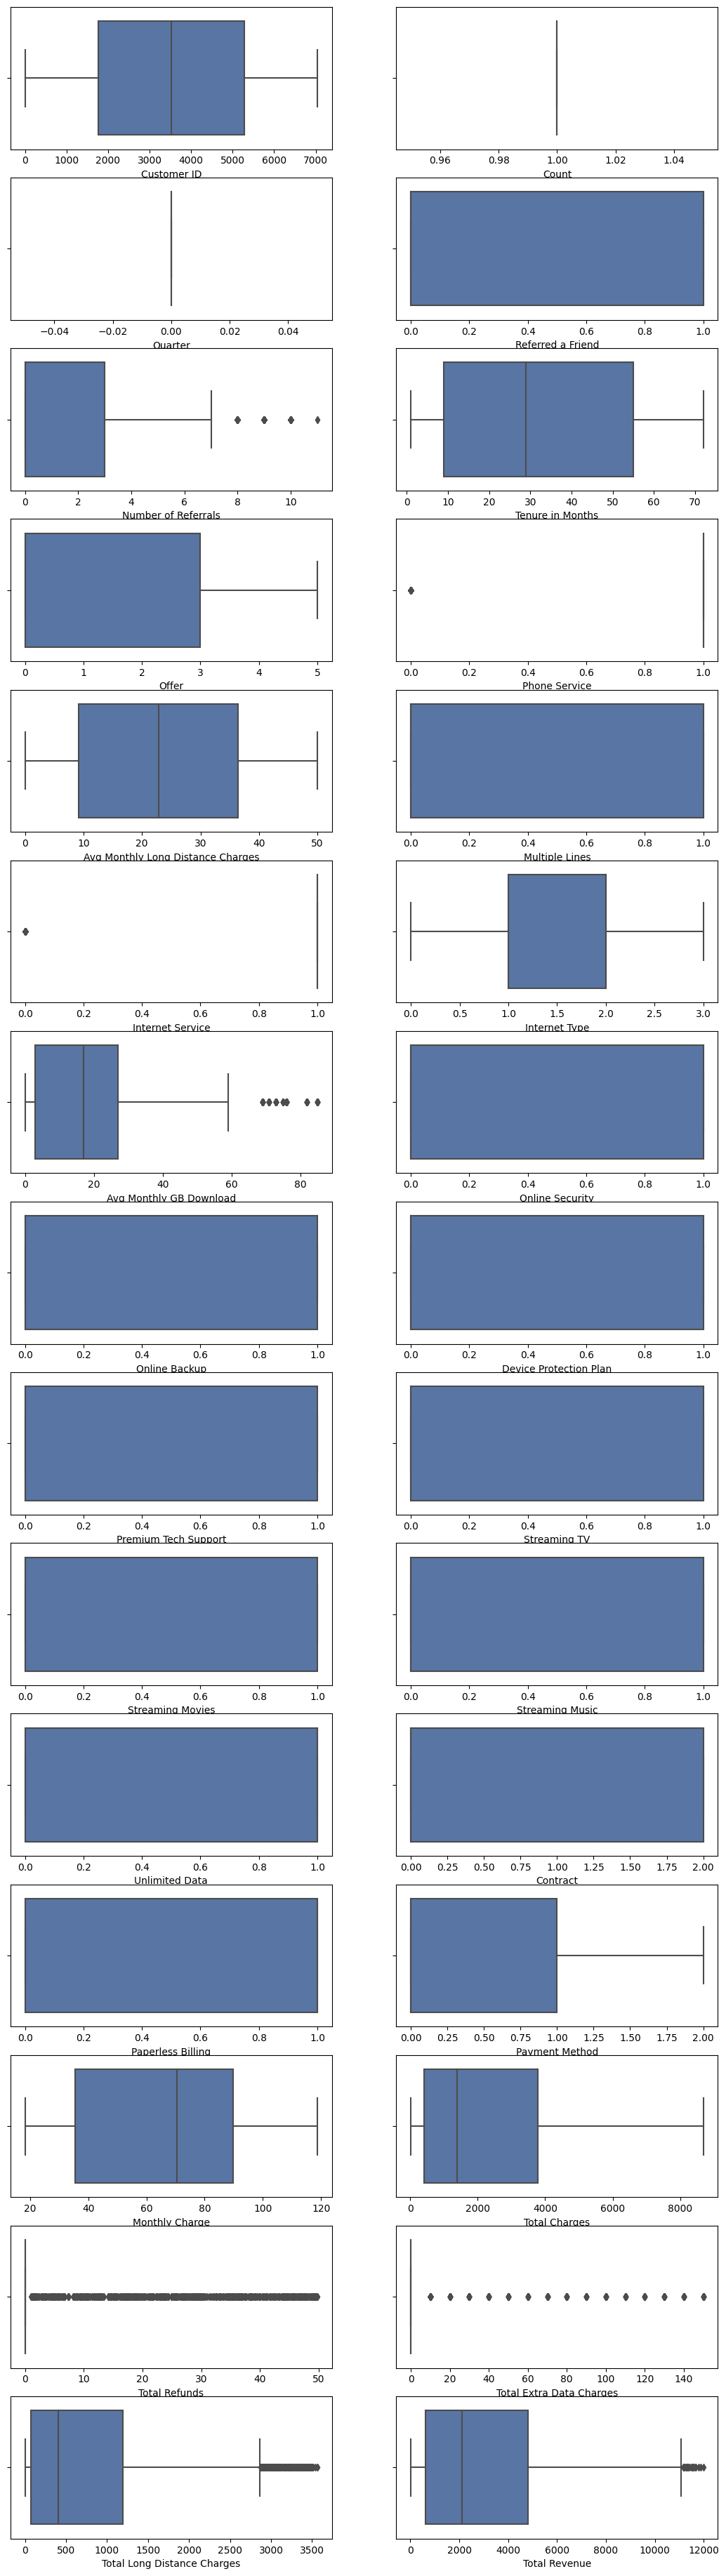

In [54]:
a = 16  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(13,50))

for i in customer.columns:
    plt.subplot(a, b, c)

    sns.boxplot(x= i ,data= customer, palette="deep" )

    c = c + 1

plt.show()

# from above we can see there are number of ouliers in the dataset

In [55]:

for i in customer.columns:
    s = customer[i]
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    iqr_lower = q1 - 1.5 * iqr
    iqr_upper = q3 + 1.5 * iqr
    outliers = dict(s[(s < iqr_lower) | (s > iqr_upper)])

    print(f"column {i} ",outliers ,"\n")

036: 76, 4038: 85, 4075: 82, 4079: 69, 4083: 85, 4086: 73, 4130: 85, 4165: 73, 4174: 69, 4206: 69, 4229: 71, 4250: 73, 4290: 82, 4302: 85, 4331: 82, 4362: 82, 4363: 69, 4374: 76, 4403: 73, 4426: 69, 4447: 73, 4463: 73, 4479: 73, 4490: 85, 4492: 76, 4496: 85, 4559: 69, 4560: 73, 4567: 69, 4570: 76, 4588: 85, 4598: 69, 4664: 85, 4704: 69, 4725: 73, 4727: 76, 4731: 73, 4752: 71, 4772: 69, 4807: 76, 4848: 73, 4876: 82, 4906: 73, 4909: 73, 4912: 82, 4938: 75, 4955: 71, 4972: 73, 4978: 69, 4994: 85, 5032: 73, 5035: 69, 5067: 73, 5081: 82, 5089: 85, 5093: 69, 5109: 69, 5110: 73, 5117: 76, 5135: 75, 5184: 85, 5193: 75, 5205: 73, 5214: 76, 5228: 82, 5250: 71, 5271: 75, 5275: 85, 5276: 75, 5326: 73, 5339: 85, 5354: 73, 5358: 82, 5365: 82, 5372: 76, 5377: 73, 5389: 76, 5390: 69, 5395: 69, 5445: 73, 5449: 73, 5452: 85, 5472: 82, 5475: 85, 5490: 71, 5528: 76, 5559: 76, 5576: 73, 5581: 76, 5591: 76, 5604: 76, 5608: 76, 5640: 85, 5655: 85, 5692: 73, 5711: 71, 5714: 82, 5742: 69, 5769: 73, 5785: 69, 5

# Replacing outlier with upper and lower limit

In [56]:
for i in customer.columns:
    s = customer[i]
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    iqr_lower = q1 - 1.5 * iqr
    iqr_upper = q3 + 1.5 * iqr

    customer[i] = pd.DataFrame(np.where(customer[i] > iqr_upper, iqr_upper, np.where(customer[i] <  iqr_lower,  iqr_lower, customer[i])))

## outliers Removed 

In [57]:
for i in customer.columns:
    s = customer[i]
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    iqr_lower = q1 - 1.5 * iqr
    iqr_upper = q3 + 1.5 * iqr
    outliers = dict(s[(s < iqr_lower) | (s > iqr_upper)])

    print(f"column {i} ",outliers ,"\n")

column Customer ID  {} 

column Count  {} 

column Quarter  {} 

column Referred a Friend  {} 

column Number of Referrals  {} 

column Tenure in Months  {} 

column Offer  {} 

column Phone Service  {} 

column Avg Monthly Long Distance Charges  {} 

column Multiple Lines  {} 

column Internet Service  {} 

column Internet Type  {} 

column Avg Monthly GB Download  {} 

column Online Security  {} 

column Online Backup  {} 

column Device Protection Plan  {} 

column Premium Tech Support  {} 

column Streaming TV  {} 

column Streaming Movies  {} 

column Streaming Music  {} 

column Unlimited Data  {} 

column Contract  {} 

column Paperless Billing  {} 

column Payment Method  {} 

column Monthly Charge  {} 

column Total Charges  {} 

column Total Refunds  {} 

column Total Extra Data Charges  {} 

column Total Long Distance Charges  {} 

column Total Revenue  {} 



# K Mean Clustering 

In [58]:
# Normalization function 
def norm_func(i):
    x = (i - i.min())	/ (i.max() - i.min())
    return (x)

In [59]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(customer.iloc[:, :])


In [60]:
df_norm.isna().sum() #missing values 

Customer ID                             0
Count                                7043
Quarter                              7043
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                        7043
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                     7043
Internet Type                           0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                    

In [61]:
columns_with_na = ["Count", "Quarter", "Phone Service", "Internet Service", "Total Refunds", "Total Extra Data Charges"]

for i in columns_with_na:
    df_norm = df_norm.drop([i], axis=1)


df_norm.isna().sum()

Customer ID                          0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Charges                        0
Total Long Distance Charges          0
Total Revenue                        0
dtype: int64

In [62]:
###### scree plot or elbow curve ############
TWSS = []
k = [*range(2, 9)]

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)

Text(0, 0.5, 'total_within_SS')

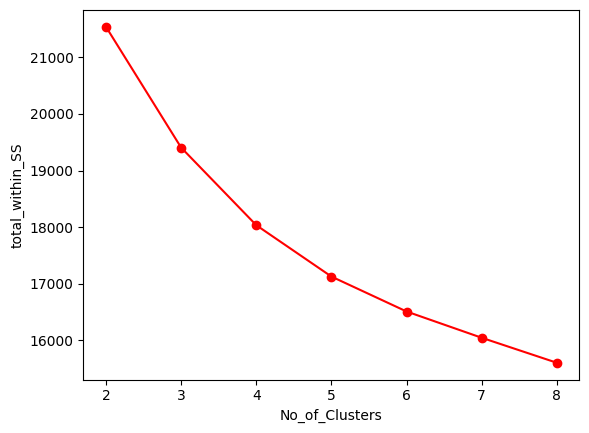

In [63]:
TWSS
# Scree plot 
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

## Selecting 5 clusters from above graph

In [64]:
# Selecting 3 clusters from the above scree plot which is the optimum number of clusters 
model = KMeans(n_clusters = 5)
model.fit(df_norm)

KMeans(n_clusters=5)

In [65]:
model.labels_ # getting the labels of clusters assigned to each row 
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 
customer['clust'] = mb # creating a  new column and assigning it to new column

In [66]:
customer.head()

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,clust
0,6207.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.00,0.0,...,0.0,1.0,0.0,39.65,39.65,0.0,0.0,0.00,59.65,1
1,5305.0,1.0,0.0,1.0,1.0,8.0,5.0,1.0,48.85,1.0,...,0.0,1.0,1.0,80.65,633.30,0.0,0.0,390.80,1024.10,1
2,1129.0,1.0,0.0,0.0,0.0,18.0,4.0,1.0,11.33,1.0,...,0.0,1.0,0.0,95.45,1752.55,0.0,0.0,203.94,1910.88,2
3,3208.0,1.0,0.0,1.0,1.0,25.0,3.0,1.0,19.76,0.0,...,0.0,1.0,0.0,98.50,2514.50,0.0,0.0,494.00,2995.07,2
4,3419.0,1.0,0.0,1.0,1.0,37.0,3.0,1.0,6.33,1.0,...,0.0,1.0,0.0,76.50,2868.15,0.0,0.0,234.21,3102.36,1


In [67]:
df_norm.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,...,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Long Distance Charges,Total Revenue
0,0.881426,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.333333,0.126984,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.212935,0.002406,0.000000,0.003458
1,0.753337,1.0,0.133333,0.098592,1.0,0.977195,1.0,0.666667,0.269841,0.0,...,0.0,0.0,1.0,0.0,1.0,0.5,0.620896,0.070909,0.136076,0.090556
2,0.160324,0.0,0.000000,0.239437,0.8,0.226645,1.0,0.666667,0.825397,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.768159,0.200063,0.071011,0.170641
3,0.455552,1.0,0.133333,0.338028,0.6,0.395279,0.0,0.666667,0.190476,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.798507,0.287988,0.172010,0.268553
4,0.485515,1.0,0.133333,0.507042,0.6,0.126625,1.0,0.666667,0.222222,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.579602,0.328796,0.081551,0.278242


In [68]:
customer.iloc[:, 2:8].groupby(customer.clust).mean()

,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service
clust,,,,,,
0,0.0,0.713592,3.169417,46.044660,0.962136,1.0
1,0.0,0.206239,0.550549,12.212016,1.990179,1.0
2,0.0,0.312453,0.885906,23.235645,1.585384,1.0
3,0.0,0.450907,1.967480,30.201376,1.422139,1.0
4,0.0,0.737705,3.105440,59.675112,0.752608,1.0


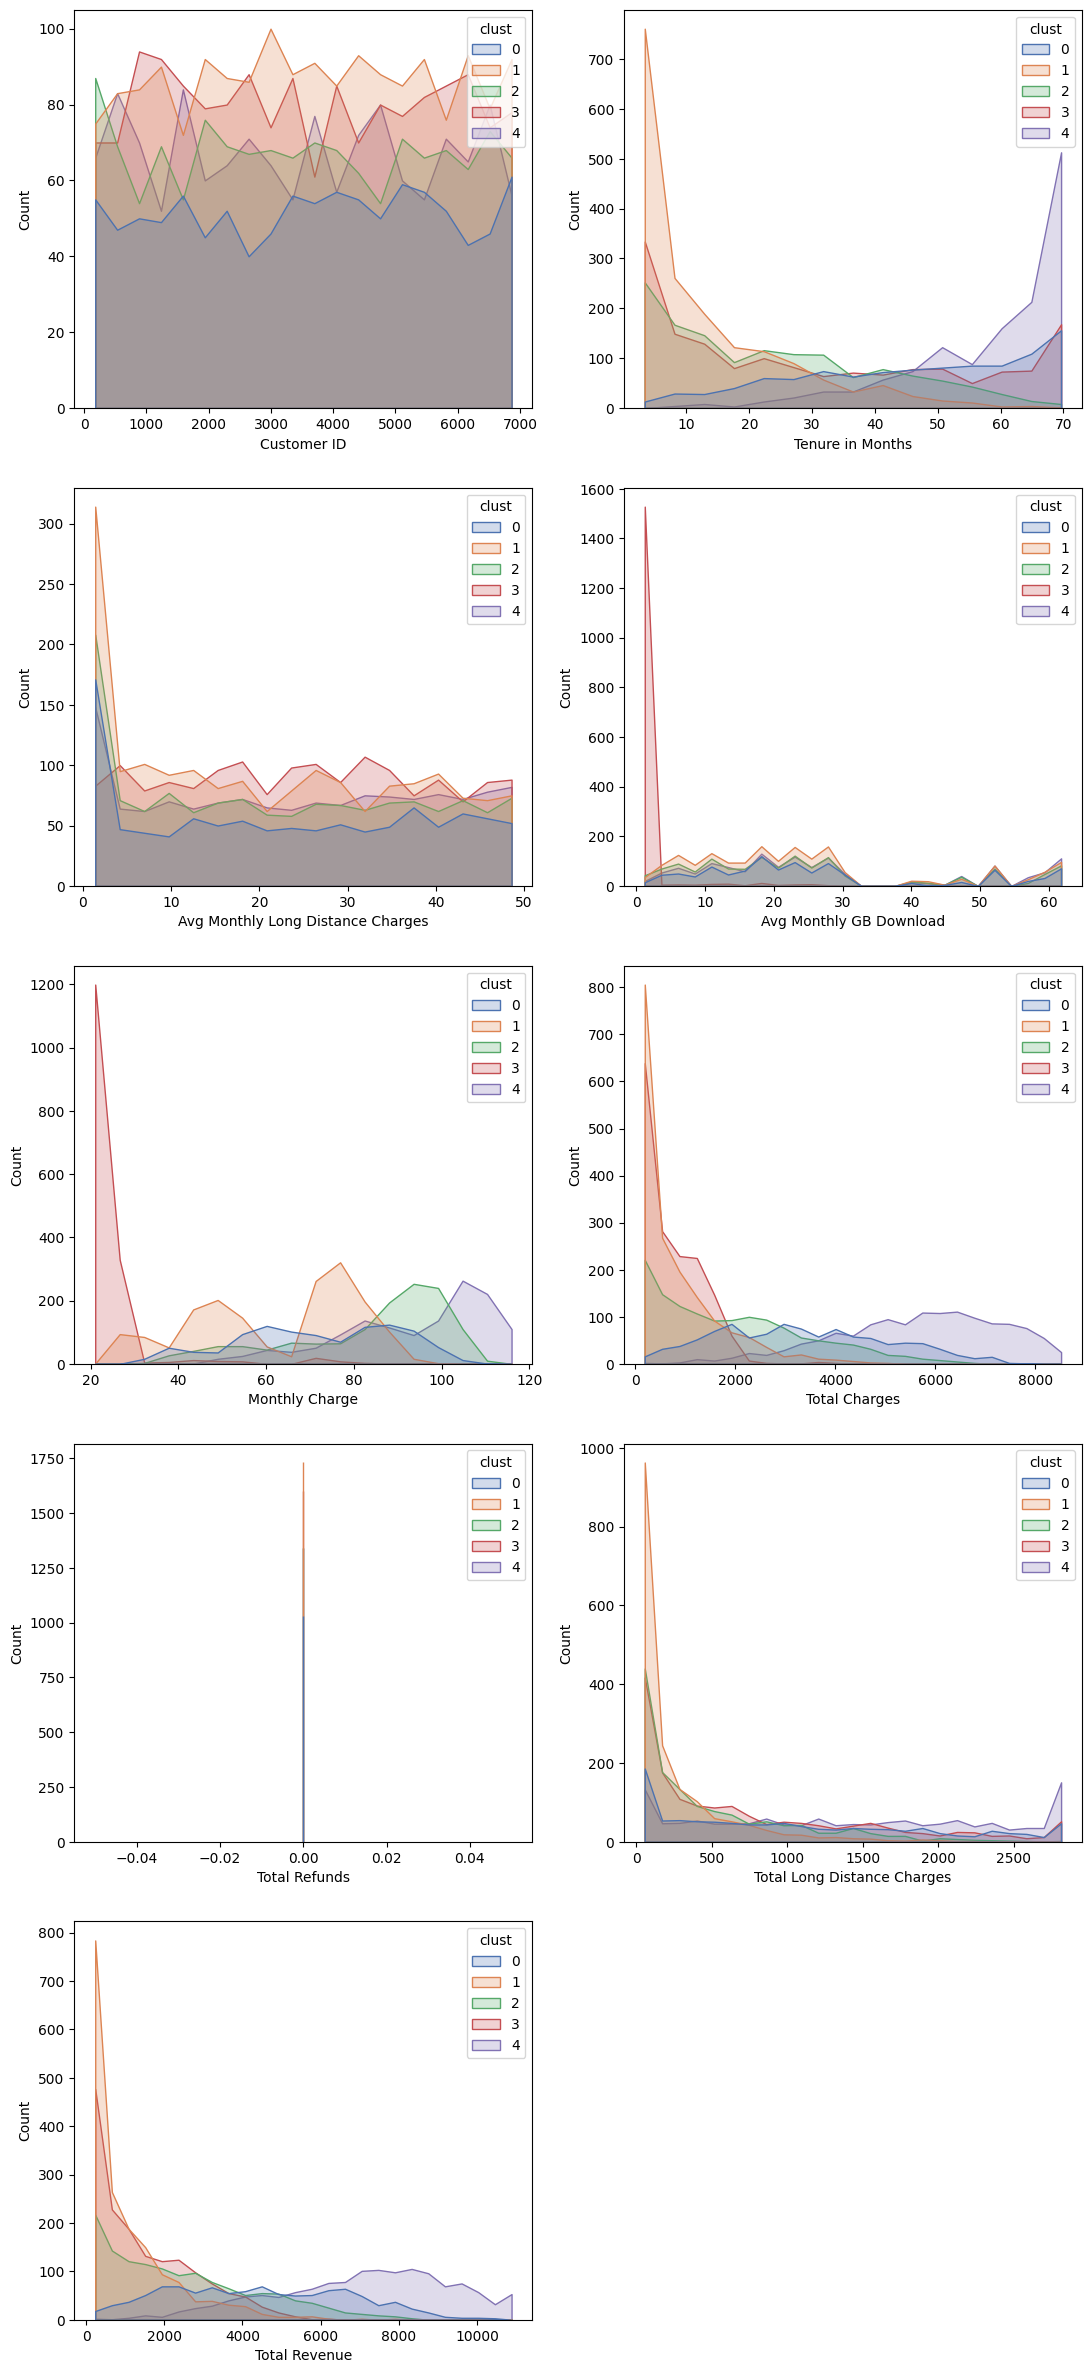

In [69]:
a = 5  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(13,30))

for i in continuous_feature:
    plt.subplot(a, b, c)

    sns.histplot(x= i,data= customer, hue= "clust",palette="deep", element= "poly" )

    c = c + 1

plt.show()

In [71]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   float64
 1   Count                              7043 non-null   float64
 2   Quarter                            7043 non-null   float64
 3   Referred a Friend                  7043 non-null   float64
 4   Number of Referrals                7043 non-null   float64
 5   Tenure in Months                   7043 non-null   float64
 6   Offer                              7043 non-null   float64
 7   Phone Service                      7043 non-null   float64
 8   Avg Monthly Long Distance Charges  7043 non-null   float64
 9   Multiple Lines                     7043 non-null   float64
 10  Internet Service                   7043 non-null   float64
 11  Internet Type                      7043 non-null   float